In [1]:
from datetime import datetime
from pathlib import Path

# import pxsas
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table

plt.style.use("Solarize_Light2")

data_path = Path("data", "xmm", "tests")

# Creation of a suitable set of XMM-Newton ARFs for ECF calculation

On-axis ARFs for pn, mos1 and mos2, without bad pixel or PSF encircled fraction corrections. I used two different, real spectra to check for potential differences.

In [ ]:
ccf_path = data_path / "nowccf.cif"   # Calibration file for an observation done today
os.environ["SAS_CCF"] = str(ccf_path.resolve())

pxsas.run(
    "arfgen",
    arfset=data_path / "now_PNS13.arf",
    spectrumset=ata_path / "PNS13SRSPEChz403409.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)
pxsas.run(
    "arfgen",
    arfset=data_path / "now_PNS16.arf",
    spectrumset=ata_path / "PNS16SRSPEChz421525.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)

pxsas.run(
    "arfgen",
    arfset=data_path / "now_M1S13.arf",
    spectrumset=data_path / "M1S13SRSPEChz403409.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)
pxsas.run(
    "arfgen",
    arfset=data_path / "now_M1S16.arf",
    spectrumset=data_path / "M1S16SRSPEChz421525.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)

pxsas.run(
    "arfgen",
    arfset=data_path / "now_M2S13.arf",
    spectrumset=data_path / "M2S13SRSPEChz403409.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)
pxsas.run(
    "arfgen",
    arfset=data_path / "now_M2S16.arf",
    spectrumset=data_path / "M2S16SRSPEChz421525.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)

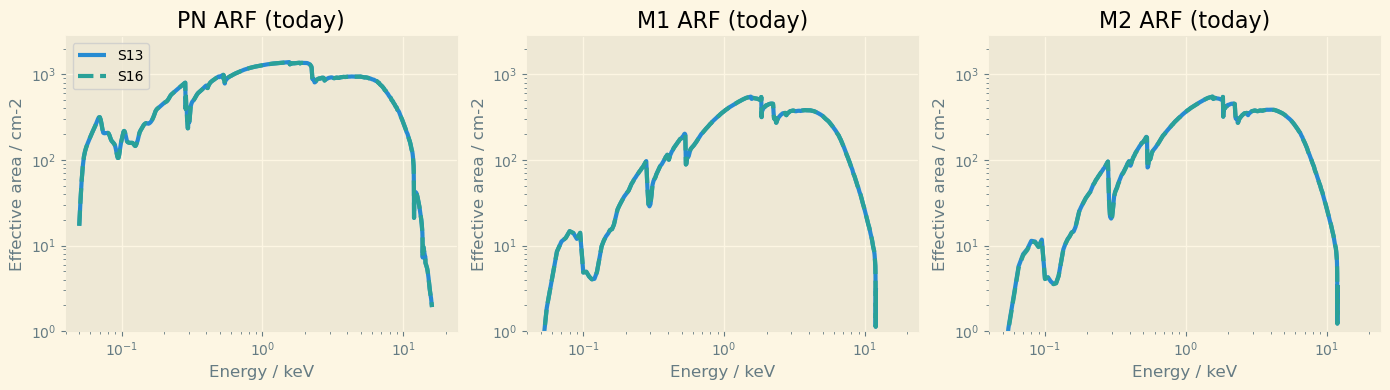

In [2]:
arf_PNS13_now = Table.read(data_path / "now_PNS13.arf", hdu="SPECRESP")
arf_PNS16_now = Table.read(data_path / "now_PNS16.arf", hdu="SPECRESP")

arf_M1S13_now = Table.read(data_path / "now_M1S13.arf", hdu="SPECRESP")
arf_M1S16_now = Table.read(data_path / "now_M1S16.arf", hdu="SPECRESP")

arf_M2S13_now = Table.read(data_path / "now_M2S13.arf", hdu="SPECRESP")
arf_M2S16_now = Table.read(data_path / "now_M2S16.arf", hdu="SPECRESP")


plt.figure(figsize=(14, 4))

ax = plt.subplot(131)
plt.title("PN ARF (today)")
plt.loglog(arf_PNS13_now["ENERG_LO"], arf_PNS13_now["SPECRESP"], lw=3, label="S13")
plt.loglog(arf_PNS16_now["ENERG_LO"], arf_PNS16_now["SPECRESP"], lw=3, ls="--", label="S16")
plt.legend()
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.subplot(132, sharey=ax, sharex=ax)
plt.title("M1 ARF (today)")
plt.loglog(arf_M1S13_now["ENERG_LO"], arf_M1S13_now["SPECRESP"], lw=3)
plt.loglog(arf_M1S16_now["ENERG_LO"], arf_M1S16_now["SPECRESP"], lw=3, ls="--")
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.subplot(133, sharey=ax, sharex=ax)
plt.title("M2 ARF (today)")
plt.loglog(arf_M2S13_now["ENERG_LO"], arf_M2S13_now["SPECRESP"], lw=3)
plt.loglog(arf_M2S16_now["ENERG_LO"], arf_M2S16_now["SPECRESP"], lw=3, ls="--")
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.xlim(0.04)
plt.ylim(1)

plt.tight_layout()
plt.show()

No differences between the ARFs using two different spectra.

Now I calculate the same set of ARFs, but using the calibration corresponding to an observation of 2001:

In [ ]:
ccf_path = data_path / "2001_ccf.cif"`
os.environ["SAS_CCF"] = str(ccf_path.resolve())

pxsas.run(
    "arfgen",
    arfset=data_path / "2001_PNS13.arf",
    spectrumset=data_path / "PNS13SRSPEChz403409.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)
pxsas.run(
    "arfgen",
    arfset=data_path / "2001_PNS16.arf",
    spectrumset=data_path / "PNS16SRSPEChz421525.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)

pxsas.run(
    "arfgen",
    arfset=data_path / "2001_M1S13.arf",
    spectrumset=data_path / "M1S13SRSPEChz403409.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)
pxsas.run(
    "arfgen",
    arfset=data_path / "2001_M1S16.arf",
    spectrumset=data_path / "M1S16SRSPEChz421525.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)

pxsas.run(
    "arfgen",
    arfset=data_path / "2001_M2S13.arf",
    spectrumset=data_path / "M2S13SRSPEChz403409.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)
pxsas.run(
    "arfgen",
    arfset=data_path / "2001_M2S16.arf",
    spectrumset=data_path / "M2S16SRSPEChz421525.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)

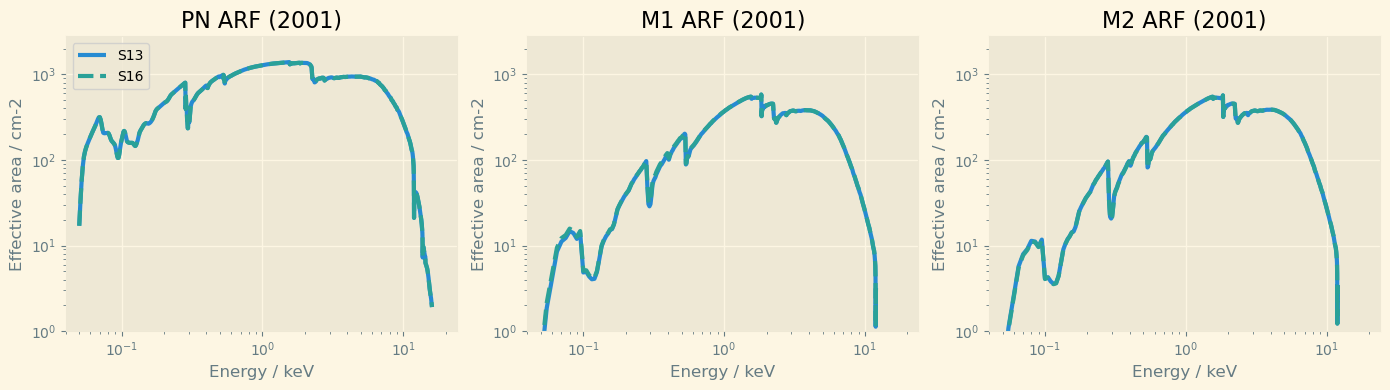

In [5]:
arf_PNS13_2001 = Table.read(data_path / "2001_PNS13.arf", hdu="SPECRESP")
arf_PNS16_2001 = Table.read(data_path / "2001_PNS16.arf", hdu="SPECRESP")

arf_M1S13_2001 = Table.read(data_path / "2001_M1S13.arf", hdu="SPECRESP")
arf_M1S16_2001 = Table.read(data_path / "2001_M1S16.arf", hdu="SPECRESP")

arf_M2S13_2001 = Table.read(data_path / "2001_M2S13.arf", hdu="SPECRESP")
arf_M2S16_2001 = Table.read(data_path / "2001_M2S16.arf", hdu="SPECRESP")


plt.figure(figsize=(14, 4))

ax = plt.subplot(131)
plt.title("PN ARF (2001)")
plt.loglog(arf_PNS13_2001["ENERG_LO"], arf_PNS13_2001["SPECRESP"], lw=3, label="S13")
plt.loglog(arf_PNS16_2001["ENERG_LO"], arf_PNS16_2001["SPECRESP"], lw=3, ls="--", label="S16")
plt.legend()
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.subplot(132, sharey=ax, sharex=ax)
plt.title("M1 ARF (2001)")
plt.loglog(arf_M1S13_2001["ENERG_LO"], arf_M1S13_2001["SPECRESP"], lw=3)
plt.loglog(arf_M1S16_2001["ENERG_LO"], arf_M1S16_2001["SPECRESP"], lw=3, ls="--")
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.subplot(133, sharey=ax, sharex=ax)
plt.title("M2 ARF (2001)")
plt.loglog(arf_M2S13_2001["ENERG_LO"], arf_M2S13_2001["SPECRESP"], lw=3)
plt.loglog(arf_M2S16_2001["ENERG_LO"], arf_M2S16_2001["SPECRESP"], lw=3, ls="--")
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.xlim(0.04)
plt.ylim(1)

plt.tight_layout()
plt.show()

Comparison between two epochs:

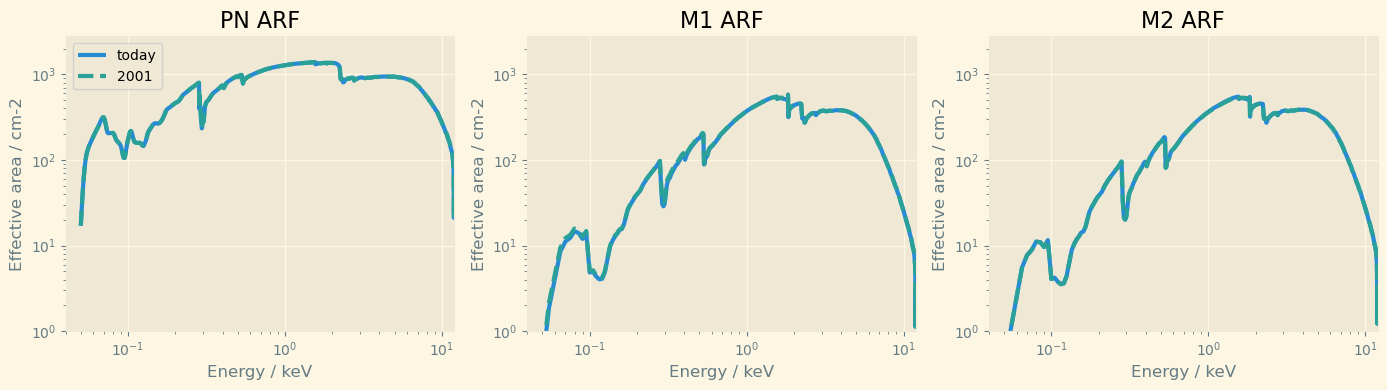

In [6]:
plt.figure(figsize=(14, 4))

ax = plt.subplot(131)
plt.title("PN ARF")
plt.loglog(arf_PNS16_now["ENERG_LO"], arf_PNS16_now["SPECRESP"], lw=3, label="today")
plt.loglog(arf_PNS16_2001["ENERG_LO"], arf_PNS16_2001["SPECRESP"], lw=3, ls="--", label="2001")
plt.legend()
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.subplot(132, sharey=ax, sharex=ax)
plt.title("M1 ARF")
plt.loglog(arf_M1S16_now["ENERG_LO"], arf_M1S16_now["SPECRESP"], lw=3)
plt.loglog(arf_M1S16_2001["ENERG_LO"], arf_M1S16_2001["SPECRESP"], lw=3, ls="--")
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.subplot(133, sharey=ax, sharex=ax)
plt.title("M2 ARF")
plt.loglog(arf_M2S16_now["ENERG_LO"], arf_M2S16_now["SPECRESP"], lw=3)
plt.loglog(arf_M2S16_2001["ENERG_LO"], arf_M2S16_2001["SPECRESP"], lw=3, ls="--")
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.xlim(0.04, 12)
plt.ylim(1)

plt.tight_layout()
plt.show()

No significant differences between epochs.

The ARFs I've generated correspond to the Thin filter. I need ARFs for the Medium and Thick filters. I can change the "FILTER" keyword in the main header of the spectral files I'm using and run again arfgen to get the new ARFs:

In [ ]:
cameras = ["PN", "M1", "M2"]
filters = ["Medium", "Thick"]

for camera in cameras:
    spec_path = data_path / f"{camera}S13SRSPEChz403409.FTZ"

    with fits.open(spec_path, "readonly") as hdul:
        for filter in filters:
            hdul[0].header["FILTER"] = filter
            
            new_spec_path = spec_path.with_stem(f"{spec_path.stem}_{filter.lower()}")
            hdul.writeto(new_spec_path, overwrite=True)

In [ ]:
ccf_path = data_path / "nowccf.cif"
os.environ["SAS_CCF"] = str(ccf_path.resolve())

pxsas.run(
    "arfgen",
    arfset=data_path / "now_PNS13_medium.arf",
    spectrumset=data_path / "PNS13SRSPEChz403409_medium.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)
pxsas.run(
    "arfgen",
    arfset=data_path / "now_PNS13_thick.arf",
    spectrumset=data_path / "PNS13SRSPEChz403409_thick.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)

pxsas.run(
    "arfgen",
    arfset=data_path / "now_M1S13_medium.arf",
    spectrumset=data_path / "M1S13SRSPEChz403409_medium.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)
pxsas.run(
    "arfgen",
    arfset=data_path / "now_M1S13_thick.arf",
    spectrumset=data_path / "M1S13SRSPEChz403409_thick.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)

pxsas.run(
    "arfgen",
    arfset=data_path / "now_M2S13_medium.arf",
    spectrumset=data_path / "M2S13SRSPEChz403409_medium.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)
pxsas.run(
    "arfgen",
    arfset=data_path / "now_M2S13_thick.arf",
    spectrumset=data_path / "M2S13SRSPEChz403409_thick.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)


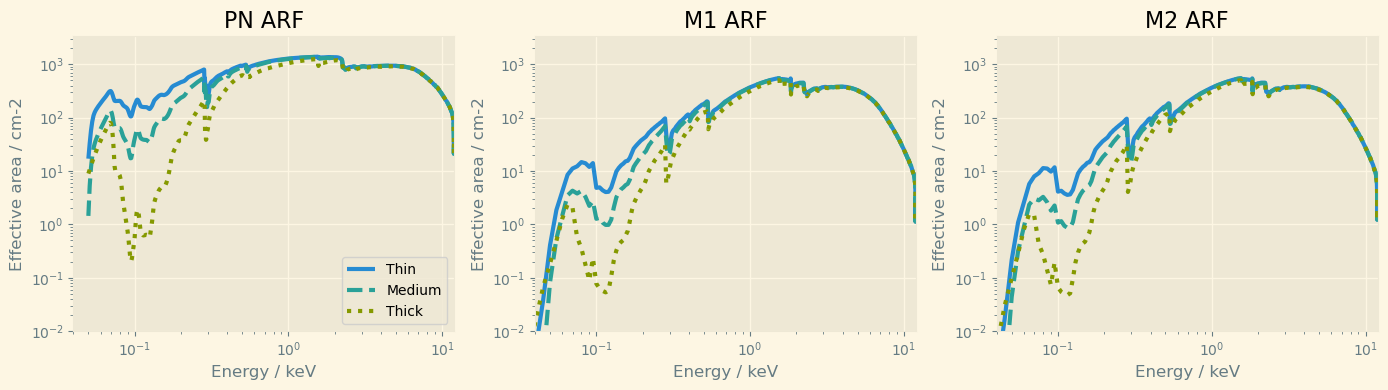

In [7]:
arf_PNS13_medium_now = Table.read(data_path / "now_PNS13_medium.arf", hdu="SPECRESP")
arf_PNS13_thick_now = Table.read(data_path / "now_PNS13_thick.arf", hdu="SPECRESP")

arf_M1S13_medium_now = Table.read(data_path / "now_M1S13_medium.arf", hdu="SPECRESP")
arf_M1S13_thick_now = Table.read(data_path / "now_M1S13_thick.arf", hdu="SPECRESP")

arf_M2S13_medium_now = Table.read(data_path / "now_M2S13_medium.arf", hdu="SPECRESP")
arf_M2S13_thick_now = Table.read(data_path / "now_M2S13_thick.arf", hdu="SPECRESP")


plt.figure(figsize=(14, 4))

ax = plt.subplot(131)
plt.title("PN ARF")
plt.loglog(arf_PNS13_now["ENERG_LO"], arf_PNS13_now["SPECRESP"], lw=3, label="Thin")
plt.loglog(arf_PNS13_medium_now["ENERG_LO"], arf_PNS13_medium_now["SPECRESP"], lw=3, ls="--", label="Medium")
plt.loglog(arf_PNS13_thick_now["ENERG_LO"], arf_PNS13_thick_now["SPECRESP"], lw=3, ls=":", label="Thick")
plt.legend()
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.subplot(132, sharey=ax, sharex=ax)
plt.title("M1 ARF")
plt.loglog(arf_M1S13_now["ENERG_LO"], arf_M1S13_now["SPECRESP"], lw=3)
plt.loglog(arf_M1S13_medium_now["ENERG_LO"], arf_M1S13_medium_now["SPECRESP"], lw=3, ls="--")
plt.loglog(arf_M1S13_thick_now["ENERG_LO"], arf_M1S13_thick_now["SPECRESP"], lw=3, ls=":")
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.subplot(133, sharey=ax, sharex=ax)
plt.title("M2 ARF")
plt.loglog(arf_M2S13_now["ENERG_LO"], arf_M2S13_now["SPECRESP"], lw=3)
plt.loglog(arf_M2S13_medium_now["ENERG_LO"], arf_M2S13_medium_now["SPECRESP"], lw=3, ls="--")
plt.loglog(arf_M2S13_thick_now["ENERG_LO"], arf_M2S13_thick_now["SPECRESP"], lw=3, ls=":")
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")


plt.xlim(0.04, 12)
plt.ylim(1e-2)

plt.tight_layout()
plt.show()

According to Mateos+2009 PN energies in the 0.2-0.5 band are estimated with ARFs calculated using only single events. Again, I can modify the header of the original spectra and run arfgen:

In [ ]:
filters = ["thin", "medium", "thick"]

for filter in filters:
    if filter == "thin":
        spec_path = data_path / "PNS13SRSPEChz403409.FTZ"
    else:
        spec_path = data_path / f"PNS13SRSPEChz403409_{filter}.FTZ"

    with fits.open(spec_path, "readonly") as hdul:
        # Event patterns are defined in the DS7 keywords
        hdul["SPECTRUM"].header["DSVAL7"] = "0"

        new_spec_path = spec_path.with_stem(f"{spec_path.stem}_singles")
        hdul.writeto(new_spec_path, overwrite=True)

In [ ]:
ccf_path = data_path / "nowccf.cif"
os.environ["SAS_CCF"] = str(ccf_path.resolve())

pxsas.run(
    "arfgen",
    arfset=data_path / "now_PNS13_singles.arf",
    spectrumset=data_path / "PNS13SRSPEChz403409_singles.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)
pxsas.run(
    "arfgen",
    arfset=data_path / "now_PNS13_medium_singles.arf",
    spectrumset=data_path / "PNS13SRSPEChz403409_medium_singles.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)
pxsas.run(
    "arfgen",
    arfset=data_path / "now_PNS13_thick_singles.arf",
    spectrumset=data_path / "PNS13SRSPEChz403409_thick_singles.FTZ",
    withrmfset=False,
    withsourcepos=True,  # on-axis position (no vignetting correction)
    sourcecoords="tel",
    sourcex=0,
    sourcey=0,
    filterdss=False,
    withdetbounds=True,
    withbadpixcorr=False,  # no correction of bad pixels
    modelee=False,    # no correction of PSF enclosed energy fraction
    detmaptype="flat", 
    detxbins=1,
    detybins=1 
)

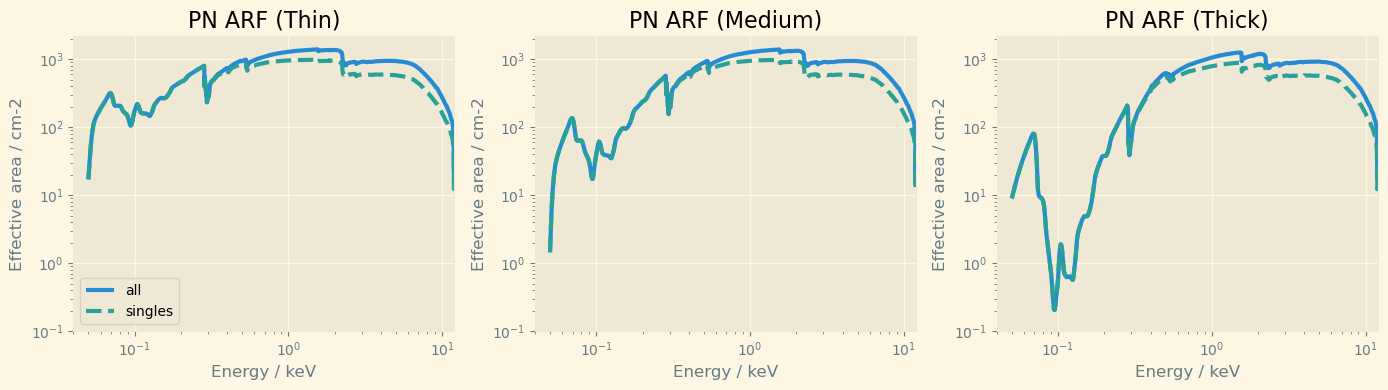

In [8]:
arf_PNS13_thin_singles = Table.read(data_path / "now_PNS13_singles.arf", hdu="SPECRESP")
arf_PNS13_medium_singles = Table.read(data_path / "now_PNS13_medium_singles.arf", hdu="SPECRESP")
arf_PNS13_thick_singles = Table.read(data_path / "now_PNS13_thick_singles.arf", hdu="SPECRESP")

plt.figure(figsize=(14, 4))

ax = plt.subplot(131)
plt.title("PN ARF (Thin)")
plt.loglog(arf_PNS13_now["ENERG_LO"], arf_PNS13_now["SPECRESP"], lw=3, label="all")
plt.loglog(arf_PNS13_thin_singles["ENERG_LO"], arf_PNS13_thin_singles["SPECRESP"], lw=3, ls="--", label="singles")
plt.legend()
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.subplot(132, sharey=ax, sharex=ax)
plt.title("PN ARF (Medium)")
plt.loglog(arf_PNS13_medium_now["ENERG_LO"], arf_PNS13_medium_now["SPECRESP"], lw=3)
plt.loglog(arf_PNS13_medium_singles["ENERG_LO"], arf_PNS13_medium_singles["SPECRESP"], lw=3, ls="--")
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.subplot(133, sharey=ax, sharex=ax)
plt.title("PN ARF (Thick)")
plt.loglog(arf_PNS13_thick_now["ENERG_LO"], arf_PNS13_thick_now["SPECRESP"], lw=3)
plt.loglog(arf_PNS13_thick_singles["ENERG_LO"], arf_PNS13_thick_singles["SPECRESP"], lw=3, ls="--")
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.xlim(0.04, 12)
plt.ylim(1e-1)

plt.tight_layout()
plt.show()

Finally, let's compare our ARFs with the those from Mateos+2009:

/tmp/ipykernel_2857337/1994725429.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(arf_M1S13_medium_now["ENERG_LO"]), np.log10(arf_M1S13_medium_now["SPECRESP"]), color="r", alpha=0.3, lw=3)


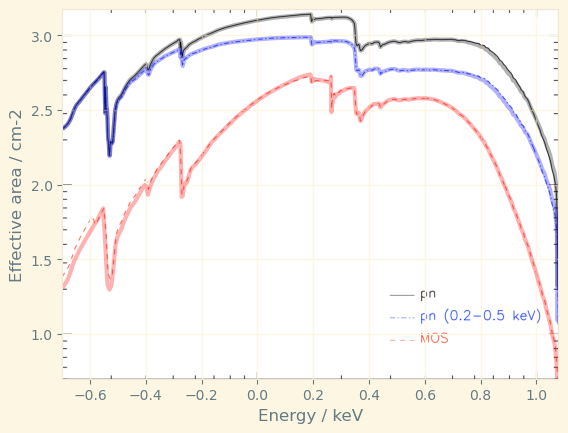

In [9]:
background_image = plt.imread("fig2_Mateos2009.png")
plt.imshow(background_image, extent=[np.log10(0.2), np.log10(12), np.log10(5), np.log10(1500)], aspect='auto')

plt.plot(np.log10(arf_PNS13_medium_now["ENERG_LO"]), np.log10(arf_PNS13_medium_now["SPECRESP"]), color="k", alpha=0.3, lw=3)
plt.plot(np.log10(arf_PNS13_medium_singles["ENERG_LO"]), np.log10(arf_PNS13_medium_singles["SPECRESP"]), color="b", alpha=0.3, lw=3)
plt.plot(np.log10(arf_M1S13_medium_now["ENERG_LO"]), np.log10(arf_M1S13_medium_now["SPECRESP"]), color="r", alpha=0.3, lw=3)

plt.xlim(np.log10(0.2), np.log10(12))
plt.ylim(np.log10(5), np.log10(1500))
plt.xlabel("Energy / keV")
plt.ylabel("Effective area / cm-2")

plt.show()